<a href="https://colab.research.google.com/github/mauracarter-statistics/csc162/blob/main/carter_maura_162_mod2_mnist_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Maura Carter**
November 9, 2025;
CSC 162;
Module 2;
CNN mnist practice.


**Prepare.** Load the packages.

In [1]:
#import necessary packages
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt


**Part 1:** Fashion MNIST CNN Implementation

**Load the data.** Use Fashion MNIST dataset.

In [14]:
#load the fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train_f, y_train_f), (x_test_f, y_test_f) = fashion_mnist.load_data()

#normalize the pixel values to be between 0 and 1, for better training performance
x_train_f = x_train_f / 255.0
x_test_f = x_test_f / 255.0

#reshape the images to include the channel dimension (28, 28, 1) (which is greyscale)
x_train_f = x_train_f.reshape(-1, 28, 28, 1)
x_test_f = x_test_f.reshape(-1, 28, 28, 1)

**Build a CNN model.**
Description of output values (for fashion items).

0) t-shirt/top
1) trouser
2) pullover
3) dress
4) coat
5) sandal
6) shirt
7) sneaker
8) bag
9) ankle boot


In [15]:
# Build a Sequential CNN model for Fashion MNIST
fashion_model = models.Sequential([
    #Convolutional layer: Applies 32 filters of size 3x3 using ReLU activation.
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    #Max pooling layer: Reduces spatial dimensions by taking the max value in 2x2 windows.
    layers.MaxPooling2D((2, 2)),

    #Second convolutional layer: Uses 64 filters to extract more complex features.
    layers.Conv2D(64, (3, 3), activation='relu'),

    #Second max pooling layer.
    layers.MaxPooling2D((2, 2)),

    #Flatten the feature maps into a 1D vector.
    layers.Flatten(),

    #Dense layer: Learns a complex representation from features.
    layers.Dense(64, activation='relu'),

    #Output layer: Produces 10 class probabilities via softmax activation.
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile the Model.**

In [17]:
#Compile the model with the Adam optimizer and sparse categorical cross-entropy loss
fashion_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])


**Print the model summary.** Review the architecture and number of parameters.


In [18]:
#Print the model summary to review the architecture and number of parameters
fashion_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

**Train the Model.**

In [19]:
#Train the Fashion MNIST model for 5 epochs (using 10% of data as validation)
fashion_model.fit(x_train_f, y_train_f, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 61s 35ms/step - accuracy: 0.7512 - loss: 0.6789 - val_accuracy: 0.8728 - val_loss: 0.3550
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 58s 34ms/step - accuracy: 0.8773 - loss: 0.3369 - val_accuracy: 0.8945 - val_loss: 0.2948
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 58s 34ms/step - accuracy: 0.8979 - loss: 0.2898 - val_accuracy: 0.8958 - val_loss: 0.2782
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9055 - loss: 0.2493 - val_accuracy: 0.9010 - val_loss: 0.2687
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9159 - loss: 0.2279 - val_accuracy: 0.9070 - val_loss: 0.2574


**Evaluate the Model.**

In [20]:
#Evaluate the model on the test set
test_loss_f, test_acc_f = fashion_model.evaluate(x_test_f, y_test_f, verbose=2)
print("Fashion MNIST Test Accuracy:", test_acc_f)

313/313 - 3s - 11ms/step - accuracy: 0.8984 - loss: 0.2828
Fashion MNIST Test Accuracy: 0.8984000086784363


**Make a Prediction.** Use a random sample from the MNIST *test* set.

In [23]:
# Make a prediction on a random sample image from the Fashion MNIST test set
sample_index_f = np.random.randint(0, x_test_f.shape[0])
sample_image_f = x_test_f[sample_index_f]
prediction_f = fashion_model.predict(sample_image_f[np.newaxis, ...])
predicted_class_f = np.argmax(prediction_f, axis=1)
print("Predicted class for Fashion MNIST sample:", predicted_class_f[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted class for Fashion MNIST sample: 5


**Display the Sample Image.** (with the predicted class).

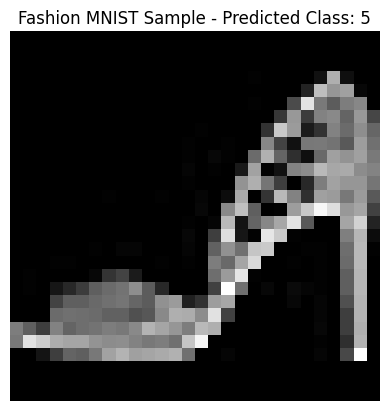

In [24]:
# Display the sample image with predicted class
plt.imshow(sample_image_f.reshape(28,28), cmap='gray')
plt.title("Fashion MNIST Sample - Predicted Class: {}".format(predicted_class_f[0]))
plt.axis('off')
plt.show()


**Part 2:** MNIST Handwritten Digits CNN Implementation

**Load** the MNIST handwriting dataset.

In [25]:
#Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train_m, y_train_m), (x_test_m, y_test_m) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Normalize** pixel values.

In [27]:
#Normalize pixel values to [0, 1]
x_train_m = x_train_m / 255.0
x_test_m = x_test_m / 255.0


**Reshape images.**

In [28]:
#Reshape images to (28, 28, 1)
x_train_m = x_train_m.reshape(-1, 28, 28, 1)
x_test_m = x_test_m.reshape(-1, 28, 28, 1)


**Build a Sequential CNN Model.** (MNIST Handwriting data)

In [30]:
#Build a Sequential CNN model for MNIST
mnist_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

**Compile the Model.**

In [31]:
#Compile the model
mnist_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

**Review the Model Architecture.**

In [ ]:
# Review the model architecture
mnist_model.summary()

**Train the MNIST model.** Use 5 epochs with 10% validation split.


In [32]:
#Train the MNIST model for 5 epochs with 10% validation split
mnist_model.fit(x_train_m, y_train_m, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 60s 35ms/step - accuracy: 0.4343 - loss: 1.5848 - val_accuracy: 0.9003 - val_loss: 0.3311
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.8813 - loss: 0.3878 - val_accuracy: 0.9293 - val_loss: 0.2388
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 59s 35ms/step - accuracy: 0.9131 - loss: 0.2869 - val_accuracy: 0.9537 - val_loss: 0.1788
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.9363 - loss: 0.2143 - val_accuracy: 0.9632 - val_loss: 0.1413
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 33ms/step - accuracy: 0.9480 - loss: 0.1766 - val_accuracy: 0.9675 - val_loss: 0.1198


**Evaluate the Model** (on the *test* set).

In [33]:
#Evaluate the model on the test set
test_loss_m, test_acc_m = mnist_model.evaluate(x_test_m, y_test_m, verbose=2)
print("MNIST Test Accuracy:", test_acc_m)

313/313 - 3s - 9ms/step - accuracy: 0.9616 - loss: 0.1292
MNIST Test Accuracy: 0.9616000056266785


**Make a Prediction.** Use a random sample image from the MNIST handwriting *test* set.

In [34]:
#Make a prediction on a random sample image from the MNIST test set
sample_index_m = np.random.randint(0, x_test_m.shape[0])
sample_image_m = x_test_m[sample_index_m]
prediction_m = mnist_model.predict(sample_image_m[np.newaxis, ...])
predicted_class_m = np.argmax(prediction_m, axis=1)
print("Predicted class for MNIST sample:", predicted_class_m[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Predicted class for MNIST sample: 7


**Display the Sample Image.** (from MNIST Handwriting).

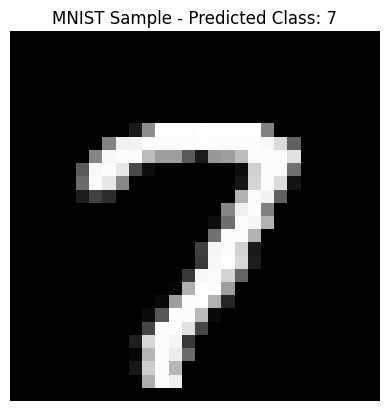

In [35]:
#Display the MNIST sample image with predicted class
plt.imshow(sample_image_m.reshape(28,28), cmap='gray')
plt.title("MNIST Sample - Predicted Class: {}".format(predicted_class_m[0]))
plt.axis('off')
plt.show()

**End of Notebook.//**